# Problem description
 
Using the Iris dataset from the scikit-learn library, we are going to create our owen dataset to cover three species, Setosa, Virginica, Versicolor. The features of our dataset are the lengths and widths of the sepal and petal of each plant of our samples. The labels given are the species of the plant, i.e. Setosa, Virginica or Versicolor. The classification task is to determine the species of the plant, given the lengths and widths of the sepal and petal of each plant.
This is a supervised learning classification problem, since we are given the targets for each sample along with its features.

## Load the data and create the dataset

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

We load the iris data into a variable called iris

In [10]:
iris = datasets.load_iris()

We can see the methods and attributes of the iris data.

In [22]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

We can printout the data description, which contains a lot of information of the data.

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [30]:
df['target']=pd.Series(iris.target)

The target values are in the form of 0,1 2 and map respectively to Setosa, Virsicolor, Virginica.

In [33]:
df.sample(n=20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
130,7.4,2.8,6.1,1.9,2
108,6.7,2.5,5.8,1.8,2
97,6.2,2.9,4.3,1.3,1
79,5.7,2.6,3.5,1.0,1
23,5.1,3.3,1.7,0.5,0
29,4.7,3.2,1.6,0.2,0
134,6.1,2.6,5.6,1.4,2
52,6.9,3.1,4.9,1.5,1
36,5.5,3.5,1.3,0.2,0


Create a new column displaying the name of the plant species.

In [39]:
df['target_names']=df['target'].apply(lambda n: iris.target_names[n])

In [44]:
df.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor


## Split the data into training and test sets

In [46]:
from sklearn.model_selection import train_test_split

In [63]:
X=df.drop(['target','target_names'],axis=1)
y=df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## Train the model and make predictions

We are chosing the DecisionTree classifier.

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
clf=DecisionTreeClassifier()

In [72]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred=clf.predict(X_test)

array([2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 0])

## Evaluate our model

In [76]:
from sklearn.metrics import accuracy_score

In [79]:
acc=accuracy_score(y_test,y_pred)

In [80]:
acc

0.9333333333333333

## Feature importance
We create a new dataframe with the features and the importance of each feature. Then, we will sort it in the order of importance.

In [81]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [98]:
df2= pd.DataFrame({'feature': X.columns, 'feature_importance': clf.feature_importances_})

In [99]:
df2

,feature,feature_importance
0,sepal length (cm),0.007502
1,sepal width (cm),0.020004
2,petal length (cm),0.945307
3,petal width (cm),0.027187


In [101]:
df2.sort_values(by= 'feature_importance',ascending=False, inplace=True)

In [103]:
df2.set_index('feature')

,feature_importance
feature,
petal length (cm),0.945307
petal width (cm),0.027187
sepal width (cm),0.020004
sepal length (cm),0.007502


## Print the internal structure of the tree model

In [104]:
from sklearn.tree import export_text

In [117]:
print(export_text(clf, feature_names=iris.feature_names, spacing=3))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.70
|   |   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.70
|   |   |   |   |--- class: 2



## Cross validation strategy: repeated random sub-sampling

In [118]:
acc_scores=[]

for n in range(0,100):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
    clf=DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

In [120]:
acc_scores=pd.Series(acc_scores)

<AxesSubplot:title={'center':'Distribution of model Accuracy Scores'}>

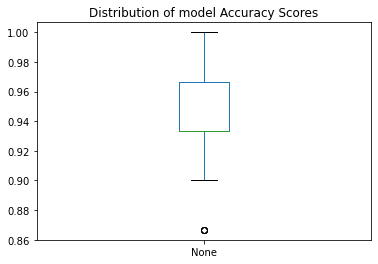

In [132]:
acc_scores.plot(title='Distribution of model Accuracy Scores',kind='box')

In [133]:
print('Average score: {:.3}'.format(acc_scores.mean()))

Average score: 0.946


## Use ShuffleSplit and cross_validate to shuffle and split the data

In [136]:
from sklearn.model_selection import ShuffleSplit, cross_validate


In [147]:
rs =ShuffleSplit(n_splits=100,test_size=0.2 )
cv_res=cross_validate(clf,X,y,cv=rs, scoring='accuracy')


In [143]:
acc_scores=pd.Series(cv_res['test_score'])

<AxesSubplot:title={'center':'Distribution of Accuracy scores'}>

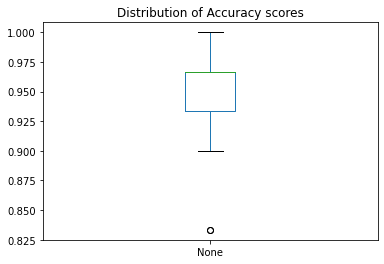

In [145]:
acc_scores.plot(title='Distribution of Accuracy scores',kind='box')

## Comparing accuracy scores with hyperparameter tuning

In [149]:
clf.get_depth()

6

In [154]:
for md in [1,2,3,4,5,6]:
    clf=DecisionTreeClassifier(max_depth=md)
    rs=ShuffleSplit(n_splits=20,test_size=0.2)
    cross_val=cross_validate(clf,X_train,y_train,cv=rs, scoring='accuracy')
    acc_scores=pd.Series(cross_val['test_score'])
    print('Max depth: {}: mean acc: {}'.format(md, acc_scores.mean()))
    


Max depth: 1: mean acc: 0.6541666666666666
Max depth: 2: mean acc: 0.9458333333333334
Max depth: 3: mean acc: 0.9354166666666666
Max depth: 4: mean acc: 0.9250000000000002
Max depth: 5: mean acc: 0.91875
Max depth: 6: mean acc: 0.9208333333333334
